<a href="https://colab.research.google.com/github/esrayuzgec/parkinsonvsalz/blob/main/Alzheimer_CN_Convnext*.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
!pip install timm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from fastbook import *
import timm
from fastai.vision.all import *
from timm import create_model
from fastai.vision.learner import _update_first_layer

In [ ]:
path = Path('/content/gdrive/MyDrive/ALZ-KONTROL')


In [ ]:
path.ls()

(#4) [Path('/content/gdrive/MyDrive/ALZ-KONTROL/Train'),Path('/content/gdrive/MyDrive/ALZ-KONTROL/Test'),Path('/content/gdrive/MyDrive/ALZ-KONTROL/ADCNvgg16_train1.pth'),Path('/content/gdrive/MyDrive/ALZ-KONTROL/ADCNvgg16_train1.pkl')]

In [ ]:

item_tfms = Resize(224)
batch_tfms = aug_transforms=[Normalize.from_stats(*imagenet_stats)]

In [ ]:
train_fnames=get_image_files(path/'Train')


In [ ]:
dblock=DataBlock(blocks=(ImageBlock,CategoryBlock),
                  get_items= get_image_files,
                  get_y = parent_label,
                  splitter =RandomSplitter(valid_pct= 0.1),
                  item_tfms = item_tfms,
                  batch_tfms = batch_tfms
                  )

In [ ]:
dls = dblock.dataloaders(path,bs=32)

In [ ]:

dls.c,len(dls.train_ds),len(dls.valid_ds)

(2, 6185, 687)

In [ ]:
dls.vocab


['AD', 'CONTROL']

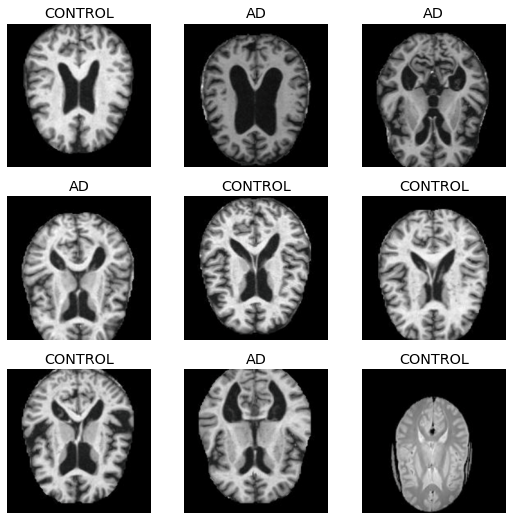

In [ ]:
dls.show_batch()


In [ ]:
timm.list_models('convnext*')

['convnext_atto',
 'convnext_atto_ols',
 'convnext_base',
 'convnext_base_384_in22ft1k',
 'convnext_base_in22ft1k',
 'convnext_base_in22k',
 'convnext_femto',
 'convnext_femto_ols',
 'convnext_large',
 'convnext_large_384_in22ft1k',
 'convnext_large_in22ft1k',
 'convnext_large_in22k',
 'convnext_nano',
 'convnext_nano_ols',
 'convnext_pico',
 'convnext_pico_ols',
 'convnext_small',
 'convnext_small_384_in22ft1k',
 'convnext_small_in22ft1k',
 'convnext_small_in22k',
 'convnext_tiny',
 'convnext_tiny_384_in22ft1k',
 'convnext_tiny_hnf',
 'convnext_tiny_in22ft1k',
 'convnext_tiny_in22k',
 'convnext_xlarge_384_in22ft1k',
 'convnext_xlarge_in22ft1k',
 'convnext_xlarge_in22k']

In [ ]:
learn= vision_learner(dls,'convnext_small_in22k',metrics=accuracy)

Downloading: "https://dl.fbaipublicfiles.com/convnext/convnext_small_22k_224.pth" to /root/.cache/torch/hub/checkpoints/convnext_small_22k_224.pth


SuggestedLRs(valley=0.0005754399462603033)

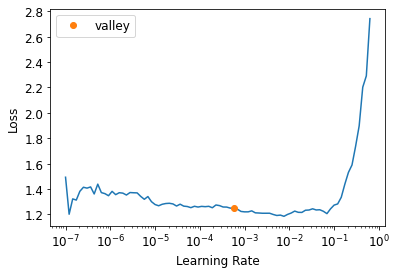

In [ ]:
learn.lr_find()

In [17]:
learn.fit_one_cycle(100,1.2e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.927712,0.557909,0.758370,03:03
1,0.784628,0.514659,0.771470,02:47
2,0.754573,0.483324,0.783115,02:46
3,0.658920,0.430940,0.788937,02:46
4,0.591032,0.393079,0.809316,02:46
5,0.532594,0.376019,0.831150,02:46
6,0.490846,0.348304,0.848617,02:46
7,0.464918,0.329309,0.851528,02:46
8,0.413423,0.298484,0.874818,02:46
9,0.375343,0.276678,0.870451,02:46


epoch,train_loss,valid_loss,accuracy,time
0,0.927712,0.557909,0.758370,03:03
1,0.784628,0.514659,0.771470,02:47
2,0.754573,0.483324,0.783115,02:46
3,0.658920,0.430940,0.788937,02:46
4,0.591032,0.393079,0.809316,02:46
5,0.532594,0.376019,0.831150,02:46
6,0.490846,0.348304,0.848617,02:46
7,0.464918,0.329309,0.851528,02:46
8,0.413423,0.298484,0.874818,02:46
9,0.375343,0.276678,0.870451,02:46


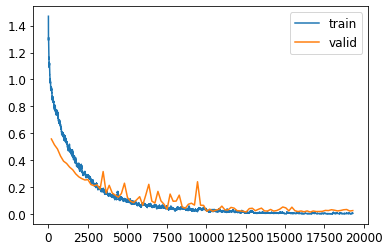

In [18]:
learn.recorder.plot_loss()

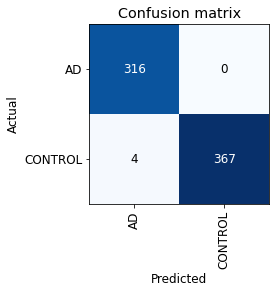

In [43]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [22]:
interp.print_classification_report()

              precision    recall  f1-score   support

          AD       0.99      1.00      0.99       316
     CONTROL       1.00      0.99      0.99       371

    accuracy                           0.99       687
   macro avg       0.99      0.99      0.99       687
weighted avg       0.99      0.99      0.99       687



In [23]:
learn.save(path/'convnext_alzzheimer_cn_train')

Path('/content/gdrive/MyDrive/ALZ-KONTROL/convnext_alzzheimer_cn_train.pth')

In [24]:
learn.export(path/'convnext_alzzheimer_cn_train.pkl')

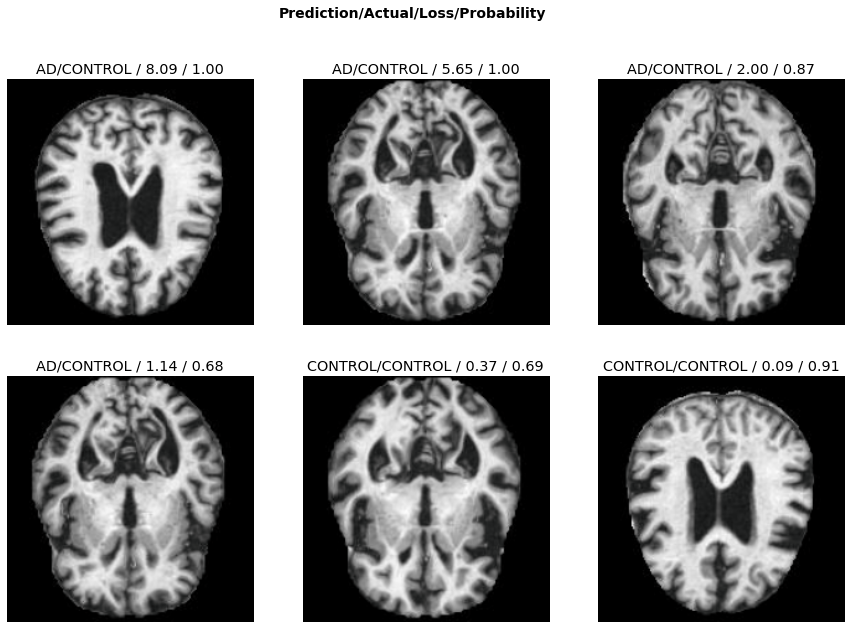

In [25]:
interp.plot_top_losses(6, figsize=(15,10))


In [26]:
all_files= get_image_files(path)


In [37]:
dblock=DataBlock(blocks=(ImageBlock(cls=PILImage),CategoryBlock),
                 splitter=GrandparentSplitter(train_name='Train', valid_name='Test'),
                 get_y=parent_label,
                 
                 item_tfms = Resize(224),
                 batch_tfms =[Normalize.from_stats(*imagenet_stats)]
              
                 
)

In [38]:
dls_test = dblock.dataloaders(all_files)


In [39]:
print("Number of examples in testing:", len(dls_test.valid_ds))


Number of examples in testing: 1301


In [40]:
learn1 = vision_learner(dls_test, 'convnext_small_in22k', metrics=accuracy).load('/content/gdrive/MyDrive/ALZ-KONTROL/convnext_alzzheimer_cn_train')


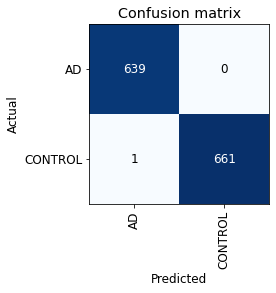

In [41]:
interp = ClassificationInterpretation.from_learner(learn1)
interp.plot_confusion_matrix()

In [42]:
preds, targs = learn1.tta()
accuracy(preds, targs).item()


0.9992313385009766